In [ ]:
!pip install torch torchvision torchaudio
!pip install scikit-learn matplotlib seaborn tqdm


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

from tqdm import tqdm



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/images.zip/metadata.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ISIC/images.zip/metadata.csv'

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/images/metadata.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ISIC/images/metadata.csv'

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/ISIC-images.zip/metadata.csv")
df.head()


NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/ISIC/ISIC-images.zip/metadata.csv'

In [ ]:
!ls /content/drive/MyDrive/ISIC


'ISIC-images (Unzipped Files)'	 ISIC-images.zip


In [ ]:
!unzip /content/drive/MyDrive/ISIC/ISIC-images.zip -d /content/drive/MyDrive/ISIC/


Archive:  /content/drive/MyDrive/ISIC/ISIC-images.zip
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000000.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000001.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000002.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000003.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000004.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000005.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000006.jpg  
 extracting: /content/drive/MyDrive/ISIC/ISIC_0000007.jpg  
 extracting: /content/drive/MyDrive/ISIC/metadata.csv  
 extracting: /content/drive/MyDrive/ISIC/attribution.txt  
 extracting: /content/drive/MyDrive/ISIC/licenses/CC-0.txt  


In [ ]:
!ls /content/drive/MyDrive/ISIC



 attribution.txt    ISIC_0000004.jpg		    ISIC-images.zip
 ISIC_0000000.jpg   ISIC_0000005.jpg		    licenses
 ISIC_0000001.jpg   ISIC_0000006.jpg		    metadata.csv
 ISIC_0000002.jpg   ISIC_0000007.jpg
 ISIC_0000003.jpg  'ISIC-images (Unzipped Files)'


In [ ]:
!ls /content/drive/MyDrive/ISIC/ISIC-images


ls: cannot access '/content/drive/MyDrive/ISIC/ISIC-images': No such file or directory


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/ISIC-images/metadata.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ISIC/ISIC-images/metadata.csv'

In [ ]:
!ls /content/drive/MyDrive/ISIC/ISIC-images


ls: cannot access '/content/drive/MyDrive/ISIC/ISIC-images': No such file or directory


In [ ]:
!ls /content/drive/MyDrive


'2015 Paper 1.pdf'
'2015 Paper 2.pdf'
'2016 Paper 1.pdf'
'2016 Paper 2.pdf'
'2017 Paper 1.pdf'
'2017 Paper 2.pdf'
'2018 Paper 1.pdf'
'2018 Paper 2.pdf'
'2018 Paper 3.pdf'
'2019 Paper 1.pdf'
'2019 Paper 2.pdf'
'2019 Paper 3.pdf'
'20211109_134432 (1).mp4'
 20211109_134432.mp4
 2022-01-16_09-33-43_com.criticalforceentertainment.criticalops.mp4
 2022-01-16_09-34-35_com.criticalforceentertainment.criticalops.mp4
 2022-01-16_09-35-54_com.criticalforceentertainment.criticalops.mp4
 2022-01-17_16-50-27_com.criticalforceentertainment.criticalops.mp4
 2022-01-17_16-53-57_com.criticalforceentertainment.criticalops.mp4
 2022-01-17_16-56-00_com.criticalforceentertainment.criticalops.mp4
 2022-01-17_17-01-50_com.criticalforceentertainment.criticalops.mp4
 2022-01-18_14-06-23_com.criticalforceentertainment.criticalops.mp4
'252077071 Signed.pdf'
'AADHAR SIDDHANT CHOWDHARY.jpg'
 CANCELLED-CHEQUE-COL-GP-CHOWDHARY.jpg
'CBSE Official Sample Papers 2022-23.pdf'
'Chapter 5_copy.pdf'
'Colab Notebooks'
'Copy 

In [ ]:
!ls /content/drive/MyDrive/ISIC


 attribution.txt    ISIC_0000004.jpg		    ISIC-images.zip
 ISIC_0000000.jpg   ISIC_0000005.jpg		    licenses
 ISIC_0000001.jpg   ISIC_0000006.jpg		    metadata.csv
 ISIC_0000002.jpg   ISIC_0000007.jpg
 ISIC_0000003.jpg  'ISIC-images (Unzipped Files)'


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/metadata.csv")
df.head()


,isic_id,attribution,copyright_license,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_5,diagnosis_confirm_type,image_type,melanocytic,sex
0,ISIC_0000000,Anonymous,CC-0,55,anterior torso,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,female
1,ISIC_0000001,Anonymous,CC-0,30,anterior torso,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,female
2,ISIC_0000002,Anonymous,CC-0,60,upper extremity,True,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",NaN,NaN,histopathology,dermoscopic,True,female
3,ISIC_0000003,Anonymous,CC-0,30,upper extremity,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,male
4,ISIC_0000004,Anonymous,CC-0,80,posterior torso,True,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",NaN,NaN,histopathology,dermoscopic,True,male


In [ ]:
df.columns



Index(['isic_id', 'attribution', 'copyright_license', 'age_approx',
       'anatom_site_general', 'concomitant_biopsy', 'diagnosis_1',
       'diagnosis_2', 'diagnosis_3', 'diagnosis_4', 'diagnosis_5',
       'diagnosis_confirm_type', 'image_type', 'melanocytic', 'sex'],
      dtype='object')

In [ ]:

df = df[['isic_id', 'diagnosis_1']]
df = df.rename(columns={'diagnosis_1': 'diagnosis'})
df = df.dropna()
df.head()


,isic_id,diagnosis
0,ISIC_0000000,Benign
1,ISIC_0000001,Benign
2,ISIC_0000002,Malignant
3,ISIC_0000003,Benign
4,ISIC_0000004,Malignant


In [ ]:
df['diagnosis'].value_counts()


,count
diagnosis,
Benign,6
Malignant,2


In [ ]:
valid_classes = ['melanoma', 'nevus', 'basal cell carcinoma']

df = df[df['diagnosis'].isin(valid_classes)]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/ISIC



'ISIC-images (2).zip'  'ISIC-images (Unzipped Files)'


In [ ]:
!ls /content/drive/MyDrive/ISIC


 attribution.txt    ISIC_0000017.jpg   ISIC_0000035.jpg
 ISIC_0000000.jpg   ISIC_0000018.jpg   ISIC_0000036.jpg
 ISIC_0000001.jpg   ISIC_0000019.jpg   ISIC_0000037.jpg
 ISIC_0000002.jpg   ISIC_0000020.jpg   ISIC_0000038.jpg
 ISIC_0000003.jpg   ISIC_0000021.jpg   ISIC_0000039.jpg
 ISIC_0000004.jpg   ISIC_0000022.jpg   ISIC_0000040.jpg
 ISIC_0000005.jpg   ISIC_0000023.jpg   ISIC_0000041.jpg
 ISIC_0000006.jpg   ISIC_0000024.jpg   ISIC_0000042.jpg
 ISIC_0000007.jpg   ISIC_0000025.jpg   ISIC_0000043.jpg
 ISIC_0000008.jpg   ISIC_0000026.jpg   ISIC_0000044.jpg
 ISIC_0000009.jpg   ISIC_0000027.jpg   ISIC_0000045.jpg
 ISIC_0000010.jpg   ISIC_0000028.jpg   ISIC_0000046.jpg
 ISIC_0000011.jpg   ISIC_0000029.jpg   ISIC_0000047.jpg
 ISIC_0000012.jpg   ISIC_0000030.jpg  'ISIC-images (Unzipped Files)'
 ISIC_0000013.jpg   ISIC_0000031.jpg   licenses
 ISIC_0000014.jpg   ISIC_0000032.jpg   metadata.csv
 ISIC_0000015.jpg   ISIC_0000033.jpg
 ISIC_0000016.jpg   ISIC_0000034.jpg


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/metadata.csv")
df.head()


,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_5,diagnosis_confirm_type,image_type,melanocytic,sex
0,ISIC_0000000,Anonymous,CC-0,55,anterior torso,NaN,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,female
1,ISIC_0000001,Anonymous,CC-0,30,anterior torso,NaN,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,female
2,ISIC_0000002,Anonymous,CC-0,60,upper extremity,NaN,True,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",NaN,NaN,histopathology,dermoscopic,True,female
3,ISIC_0000003,Anonymous,CC-0,30,upper extremity,NaN,False,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Atypical, Dysplastic, or Clark","Nevus, Dysplastic",NaN,dermoscopic,True,male
4,ISIC_0000004,Anonymous,CC-0,80,posterior torso,NaN,True,Malignant,Malignant melanocytic proliferations (Melanoma),"Melanoma, NOS",NaN,NaN,histopathology,dermoscopic,True,male


In [ ]:
df = df[['isic_id', 'diagnosis_3']]
df = df.rename(columns={'diagnosis_3': 'diagnosis'})
df = df.dropna()


KeyError: "['diagnosis_3'] not in index"

In [ ]:
import os

BASE = "/content/drive/MyDrive/ISIC"
OUT = os.path.join(BASE, "processed")

for split in ['train', 'val', 'test']:
    for cls in df['diagnosis'].unique():
        os.makedirs(os.path.join(OUT, split, cls), exist_ok=True)


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

train_df, temp_df = train_test_split(
    df, test_size=0.3, stratify=df['diagnosis'], random_state=42
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['diagnosis'], random_state=42
)

def copy_imgs(df, split):
    for _, row in df.iterrows():
        img = row['isic_id'] + ".jpg"
        src = os.path.join(BASE, img)
        dst = os.path.join(OUT, split, row['diagnosis'], img)
        if os.path.exists(src):
            shutil.copy(src, dst)

copy_imgs(train_df, "train")
copy_imgs(val_df, "val")
copy_imgs(test_df, "test")


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
!ls /content/drive/MyDrive/ISIC/processed/train


ls: cannot access '/content/drive/MyDrive/ISIC/processed/train': No such file or directory


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

train_df, temp_df = train_test_split(
    df, test_size=0.3, stratify=df['diagnosis'], random_state=42
)

val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['diagnosis'], random_state=42
)

def copy_imgs(df, split):
    for _, row in df.iterrows():
        img = row['isic_id'] + ".jpg"
        src = os.path.join(BASE, img)
        dst = os.path.join(OUT, split, row['diagnosis'], img)
        if os.path.exists(src):
            shutil.copy(src, dst)

copy_imgs(train_df, "train")
copy_imgs(val_df, "val")
copy_imgs(test_df, "test")


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print("Total rows:", len(df))
df.head()


Total rows: 0


,isic_id,diagnosis


In [ ]:

pd.read_csv("/content/drive/MyDrive/ISIC/metadata.csv")['diagnosis_1'].value_counts()



,count
diagnosis_1,
Benign,35
Malignant,13


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ISIC/metadata.csv")


In [ ]:
df = df[['isic_id', 'diagnosis_3']]
df = df.rename(columns={'diagnosis_3': 'diagnosis'})
df = df.dropna()

df.head()


,isic_id,diagnosis
0,ISIC_0000000,Nevus
1,ISIC_0000001,Nevus
2,ISIC_0000002,"Melanoma, NOS"
3,ISIC_0000003,Nevus
4,ISIC_0000004,"Melanoma, NOS"


In [ ]:
df['diagnosis'].value_counts()


,count
diagnosis,
Nevus,35
Melanoma Invasive,9
"Melanoma, NOS",3
Melanoma in situ,1


In [ ]:
df['diagnosis'] = df['diagnosis'].replace({
    'Melanoma Invasive': 'Melanoma',
    'Melanoma, NOS': 'Melanoma',
    'Melanoma in situ': 'Melanoma'
})


In [ ]:
df['diagnosis'].value_counts()


,count
diagnosis,
Nevus,35
Melanoma,13


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['diagnosis'],
    random_state=42
)


In [ ]:
import os

BASE = "/content/drive/MyDrive/ISIC"
OUT = os.path.join(BASE, "processed")

for split in ['train', 'test']:
    for cls in df['diagnosis'].unique():
        os.makedirs(os.path.join(OUT, split, cls), exist_ok=True)


In [ ]:
import shutil

def copy_images(data, split):
    for _, row in data.iterrows():
        img = row['isic_id'] + ".jpg"
        src = os.path.join(BASE, img)
        dst = os.path.join(OUT, split, row['diagnosis'], img)
        if os.path.exists(src):
            shutil.copy(src, dst)

copy_images(train_df, "train")
copy_images(test_df, "test")


In [ ]:
!ls /content/drive/MyDrive/ISIC/processed/train


Melanoma  Nevus


In [ ]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dataset = ImageFolder(
    "/content/drive/MyDrive/ISIC/processed/train",
    transform=train_transform
)

test_dataset = ImageFolder(
    "/content/drive/MyDrive/ISIC/processed/test",
    transform=test_transform
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


In [ ]:
model = SimpleCNN().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(10):
    model.train()
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [ ]:
from torchvision.models import resnet18

resnet = resnet18(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)
resnet = resnet.cuda()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 185MB/s]


In [ ]:
features = resnet.layer4(images)
attention = torch.mean(features, dim=1, keepdim=True)



RuntimeError: Given groups=1, weight of size [512, 256, 3, 3], expected input[6, 3, 224, 224] to have 256 channels, but got 3 channels instead

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)


In [ ]:
from torchvision.models import resnet18

resnet = resnet18(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)
resnet = resnet.cuda()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
features = resnet.layer4(images)
attention = torch.mean(features, dim=1, keepdim=True)


RuntimeError: Given groups=1, weight of size [512, 256, 3, 3], expected input[6, 3, 224, 224] to have 256 channels, but got 3 channels instead

In [ ]:

feature_extractor = torch.nn.Sequential(
    resnet.conv1,
    resnet.bn1,
    resnet.relu,
    resnet.maxpool,
    resnet.layer1,
    resnet.layer2,
    resnet.layer3,
    resnet.layer4
).cuda()

features = feature_extractor(images)
print(features.shape)


torch.Size([6, 512, 7, 7])


In [ ]:
from torchvision.models import resnet18

resnet = resnet18(pretrained=True)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)
resnet = resnet.cuda()


In [ ]:
features = resnet.layer4(images)
attention = torch.mean(features, dim=1, keepdim=True)


RuntimeError: Given groups=1, weight of size [512, 256, 3, 3], expected input[6, 3, 224, 224] to have 256 channels, but got 3 channels instead

In [ ]:

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/ISIC


 attribution.txt    ISIC_0000017.jpg   ISIC_0000035.jpg
 ISIC_0000000.jpg   ISIC_0000018.jpg   ISIC_0000036.jpg
 ISIC_0000001.jpg   ISIC_0000019.jpg   ISIC_0000037.jpg
 ISIC_0000002.jpg   ISIC_0000020.jpg   ISIC_0000038.jpg
 ISIC_0000003.jpg   ISIC_0000021.jpg   ISIC_0000039.jpg
 ISIC_0000004.jpg   ISIC_0000022.jpg   ISIC_0000040.jpg
 ISIC_0000005.jpg   ISIC_0000023.jpg   ISIC_0000041.jpg
 ISIC_0000006.jpg   ISIC_0000024.jpg   ISIC_0000042.jpg
 ISIC_0000007.jpg   ISIC_0000025.jpg   ISIC_0000043.jpg
 ISIC_0000008.jpg   ISIC_0000026.jpg   ISIC_0000044.jpg
 ISIC_0000009.jpg   ISIC_0000027.jpg   ISIC_0000045.jpg
 ISIC_0000010.jpg   ISIC_0000028.jpg   ISIC_0000046.jpg
 ISIC_0000011.jpg   ISIC_0000029.jpg   ISIC_0000047.jpg
 ISIC_0000012.jpg   ISIC_0000030.jpg  'ISIC-images (Unzipped Files)'
 ISIC_0000013.jpg   ISIC_0000031.jpg   licenses
 ISIC_0000014.jpg   ISIC_0000032.jpg   metadata.csv
 ISIC_0000015.jpg   ISIC_0000033.jpg   processed
 ISIC_0000016.jpg   ISIC_0000034.jpg


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ISIC/metadata.csv")

df['diagnosis'] = df['diagnosis_3'].replace({
    'Melanoma Invasive': 'Melanoma',
    'Melanoma, NOS': 'Melanoma',
    'Melanoma in situ': 'Melanoma'
})

df = df[df['diagnosis'].isin(['Melanoma', 'Nevus'])]

df = df[['isic_id', 'diagnosis']].dropna()
df['diagnosis'].value_counts()


,count
diagnosis,
Nevus,35
Melanoma,13


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, test_size=0.2, stratify=df['diagnosis'], random_state=42
)


In [ ]:
BASE = "/content/drive/MyDrive/ISIC"
OUT = os.path.join(BASE, "processed")

for split in ['train', 'test']:
    for cls in ['Melanoma', 'Nevus']:
        os.makedirs(os.path.join(OUT, split, cls), exist_ok=True)


In [ ]:
def copy_images(df_split, split):
    for _, row in df_split.iterrows():
        src = os.path.join(BASE, row['isic_id'] + ".jpg")
        dst = os.path.join(OUT, split, row['diagnosis'], row['isic_id'] + ".jpg")
        if os.path.exists(src):
            shutil.copy(src, dst)

copy_images(train_df, 'train')
copy_images(test_df, 'test')


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [ ]:
train_dataset = ImageFolder(os.path.join(OUT, 'train'), transform=train_transform)
test_dataset = ImageFolder(os.path.join(OUT, 'test'), transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32*56*56, 128), nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

cnn_model = SimpleCNN().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)


In [ ]:
for epoch in range(10):
    cnn_model.train()
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

resnet = resnet18(weights=ResNet18_Weights.DEFAULT)
resnet.fc = nn.Linear(resnet.fc.in_features, 2)
resnet = resnet.cuda()


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


Number of patches: 49


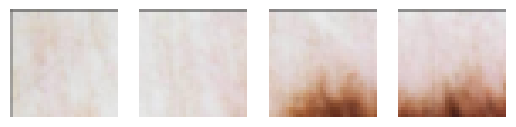

In [ ]:
patch_size = 32
images, _ = next(iter(train_loader))
img = images[0]
C, H, W = img.shape

patches = img.unfold(1, patch_size, patch_size).unfold(2, patch_size, patch_size)
patches = patches.contiguous().view(C, -1, patch_size, patch_size).permute(1,0,2,3)
print("Number of patches:", patches.shape[0])

for i in range(min(4, patches.shape[0])):
    plt.subplot(1,4,i+1)
    plt.imshow(patches[i].permute(1,2,0))
    plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import torch.nn.functional as F

def evaluate(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.cuda(), labels.cuda()
            outputs = model(images)
            preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

evaluate(cnn_model, test_loader)
evaluate(resnet, test_loader)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.70      1.00      0.82         7

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10

Confusion Matrix:
[[0 3]
 [0 7]]
              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.67      0.57      0.62         7

    accuracy                           0.50        10
   macro avg       0.46      0.45      0.45        10
weighted avg       0.54      0.50      0.52        10

Confusion Matrix:
[[1 2]
 [3 4]]
